### Problem statement 

#### Identifying how the salary is varying to other factors

### Basic Exploratory steps

In [35]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy as scipy


In [36]:
#reading dataset using pandas and storing  in variable hr
hr=pd.read_csv('C:\\Users\\DELL\\Desktop\\dataset\\New_data_Set.csv')
hr.head(5)

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1,High School or less


In [37]:
#displaying columns 
hr.columns

Index(['Gender', 'Business', 'Dependancies', 'Calls', 'Type', 'Billing',
       'Rating', 'Age', 'Salary', 'Base_pay', 'Bonus', 'Unit_Price', 'Volume',
       'openingbalance', 'closingbalance', 'low', 'Unit_Sales', 'Total_Sales',
       'Months', 'Education'],
      dtype='object')

# Feature Description

* Gender - talks of the gender - Male or female
* Business - if the person has a business or no
* Age - age of the person
* Salary - CTC of the employee
* Dependants - number of people dependant on the person
* Months - duration of the person employed with the company
* Calls - if the person has authority to make calls or not
* Type - salary settlement type
* Billing - Subscribed to billing plans or no
* Unit sales - unit sale made by the person
* Total sales - total sales made by the person
* Rating - If he has been given a rating by a superior or no
* Bonus - amount received by a person as bonus for sales
* Base pay - Base pay of the employee
* Unit price - The Unit price of a sale
* Volume - volume allotted to a person
* Opening balance - The opening balance of an employee
* Low - lowest balance allotted to a person.
* Closing Balance- The closing balance of an employee
* Education- Educational background of an employee


In [38]:
#displaying rows and column of dataset(5000 rows,20 columns)
hr.shape

(5000, 20)

In [39]:
hr=hr.replace(r'^\s*$',np.NaN,regex=True)
hr.head(2)

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.450,3.77,21226600,3.75,3.76,3.65,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.906,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,High School or less


In [40]:
#displaying columns type
hr.dtypes

Gender             object
Business            int64
Dependancies       object
Calls              object
Type               object
Billing            object
Rating             object
Age                 int64
Salary            float64
Base_pay          float64
Bonus             float64
Unit_Price        float64
Volume              int64
openingbalance    float64
closingbalance    float64
low               float64
Unit_Sales        float64
Total_Sales        object
Months              int64
Education          object
dtype: object

In [41]:
#finding null values in dataset
hr.isnull().sum()

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay            23
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1476
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales         16
Months               0
Education            0
dtype: int64

In [42]:
# percentage of null values
hr.isna().sum()/len(hr)*100

Gender             0.00
Business           0.00
Dependancies       0.00
Calls              0.00
Type               0.00
Billing            0.00
Rating             0.00
Age                0.00
Salary             0.00
Base_pay           0.46
Bonus              0.00
Unit_Price         0.00
Volume             0.00
openingbalance    29.52
closingbalance     0.00
low                0.00
Unit_Sales         0.00
Total_Sales        0.32
Months             0.00
Education          0.00
dtype: float64

### Since openingbalance  has nearly 30% missing values, so removing it from the dataset

In [43]:
hr.drop(columns='openingbalance', inplace=True)

In [44]:
hr.columns

Index(['Gender', 'Business', 'Dependancies', 'Calls', 'Type', 'Billing',
       'Rating', 'Age', 'Salary', 'Base_pay', 'Bonus', 'Unit_Price', 'Volume',
       'closingbalance', 'low', 'Unit_Sales', 'Total_Sales', 'Months',
       'Education'],
      dtype='object')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Base_pay', ylabel='Density'>

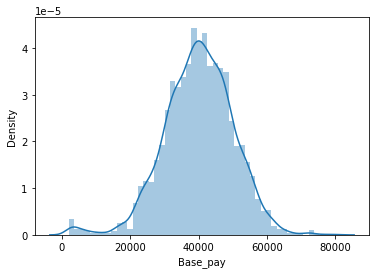

In [45]:
sns.distplot(hr['Base_pay'],kde=True)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Sales', ylabel='Density'>

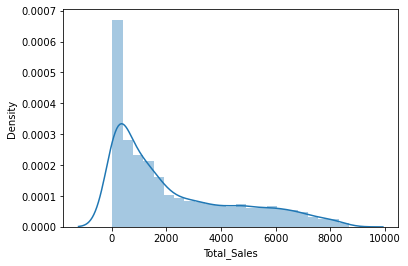

In [46]:
sns.distplot(hr['Total_Sales'],kde=True)

#### As base pay is normally distributed wo will replace null values with mean and total_sales is not normally distributed so we replace null values with medain 

In [48]:
hr['Base_pay'].fillna((hr['Base_pay'].mean()),inplace=True) #replacing null values with mean
hr['Total_Sales']=pd.to_numeric(hr['Total_Sales'],errors='coerce') #changing datatype
hr['Total_Sales'].fillna((hr['Total_Sales'].median()),inplace=True) #replacing null values with mean

In [49]:
#finding information of dataset using info()
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        5000 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  closingbalance  5000 non-null   float64
 14  low             5000 non-null   float64
 15  Unit_Sales      5000 non-null   float64
 16  Total_Sales     5000 non-null   float64
 17  Months          5000 non-null   i

### here we can see that there are no null values present and datatype of totalsales is also changed

In [50]:
#describe will show each column count mean median etc.
hr.describe()

,Business,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,closingbalance,low,Unit_Sales,Total_Sales,Months
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.00000,5000.00000,5000.00000
mean,0.160000,51.865000,99821.928553,40046.187707,4991.096428,51.258522,6.761260e+06,43.577828,43.034129,64.84151,2269.56846,32.18480
std,0.366643,8.560691,25376.961744,10112.342452,1268.848087,52.244022,1.620476e+07,37.148512,36.760641,30.13968,2264.62695,24.63673
min,0.000000,18.000000,5089.000000,2035.600000,254.450000,1.440000,0.000000e+00,3.680000,3.650000,18.25000,18.80000,0.00000
25%,0.000000,47.000000,83890.338980,33744.021630,4194.516950,25.727500,1.283850e+06,21.990000,21.718750,35.50000,389.21250,8.00000
50%,0.000000,52.000000,100579.378500,40231.751415,5028.968925,39.205000,2.870600e+06,33.340000,32.880001,70.50000,1395.65000,28.00000
75%,0.000000,57.000000,116912.092475,46764.836975,5845.604624,58.715000,6.247100e+06,51.117500,50.415000,89.95000,3722.33750,55.00000
max,1.000000,88.000000,199970.740000,79988.296000,9998.537000,629.511067,3.208684e+08,313.688694,312.432438,118.75000,8684.80000,72.00000


In [51]:
#checking for duplicate values
hr.duplicated().sum()

0

### there are no duplicate values present in dataset

### checking correlation using spearman

In [52]:
hr.corr(method='spearman')

,Business,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,closingbalance,low,Unit_Sales,Total_Sales,Months
Business,1.000000,-0.008435,-0.018403,-0.019262,-0.018403,-0.019480,-0.002192,-0.007485,-0.018103,-0.018363,-0.019652,-0.012282
Age,-0.008435,1.000000,0.202282,0.192930,0.202282,0.128266,-0.039345,0.440989,0.202040,0.202268,0.195908,0.222837
Salary,-0.018403,0.202282,1.000000,0.994006,1.000000,0.811713,-0.390488,0.346498,0.999859,0.999997,0.995928,0.603796
Base_pay,-0.019262,0.192930,0.994006,1.000000,0.994006,0.808311,-0.390056,0.339834,0.993859,0.994002,0.989943,0.597308
Bonus,-0.018403,0.202282,1.000000,0.994006,1.000000,0.811713,-0.390488,0.346498,0.999859,0.999997,0.995928,0.603796
Unit_Price,-0.019480,0.128266,0.811713,0.808311,0.811713,1.000000,-0.324230,0.263699,0.812412,0.811735,0.807761,0.550062
Volume,-0.002192,-0.039345,-0.390488,-0.390056,-0.390488,-0.324230,1.000000,-0.147108,-0.392209,-0.390505,-0.390624,-0.262077
closingbalance,-0.007485,0.440989,0.346498,0.339834,0.346498,0.263699,-0.147108,1.000000,0.346278,0.346485,0.341554,0.365927
low,-0.018103,0.202040,0.999859,0.993859,0.999859,0.812412,-0.392209,0.346278,1.000000,0.999856,0.995776,0.603752
Unit_Sales,-0.018363,0.202268,0.999997,0.994002,0.999997,0.811735,-0.390505,0.346485,0.999856,1.000000,0.995918,0.603779


<AxesSubplot:>

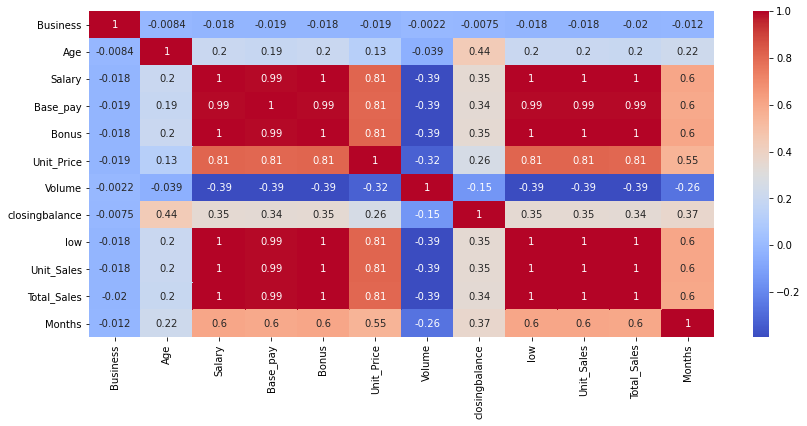

In [53]:
plt.figure(figsize=(14,6))
sns.heatmap(hr.corr(method='spearman'),annot=True, cmap="coolwarm")

### Relation between Salary and categorical variables 

<AxesSubplot:xlabel='Gender', ylabel='count'>

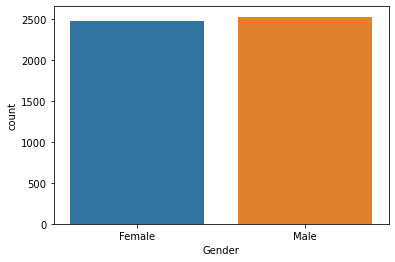

In [54]:
sns.countplot(x=hr.Gender)

### there are slightly high number of males as comapre to female

#### plotting boxplot for Gender and salary

<AxesSubplot:xlabel='Gender', ylabel='Salary'>

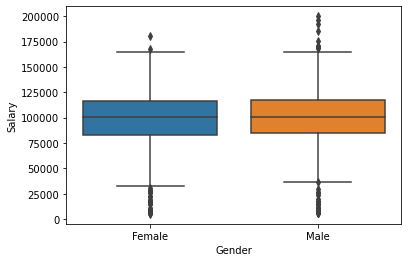

In [55]:

sns.boxplot(x=hr['Gender'],y=hr['Salary'])

In [61]:
stats.f_oneway(Gender,Salary)

NameError: name 'Gender' is not defined

### median is same for gender so they are not effecting salary 

#### plotting boxplot for Business and salary

In [ ]:
sns.boxplot(x=hr['Business'],y=hr['Salary'])

In [ ]:
#median is same for business so they are no effecting salary 

#### plotting boxplot for Education and salary

In [ ]:
sns.boxplot(x=hr['Education'],y=hr['Salary'])

#### here median is varying so salary is dependent based on education

In [63]:
#Grouping Education and Salary to make pie chart 
 
data=hr.groupby('Education')['Salary'].mean()
data

Education
Graduation              91731.465271
High School or less      8021.192905
Intermediate             8797.040201
PG                     106455.698134
Name: Salary, dtype: float64

([<matplotlib.patches.Wedge at 0xb3561b7c10>,
 [Text(0.2512511965845778, 1.0709214892861278, 'Graduation'),
  Text(-1.03567109365656, 0.37065534633163577, 'High School or less'),
  Text(-1.094728187134633, 0.10756484691998602, 'Intermediate'),
  Text(0.016827559436772176, -1.0998712803066557, 'PG')],
 [Text(0.1370461072279515, 0.5841389941560696, '43%'),
  Text(-0.5649115056308509, 0.2021756434536195, '4%'),
  Text(-0.5971244657097998, 0.058671734683628726, '4%'),
  Text(0.009178668783693913, -0.5999297892581757, '50%')])

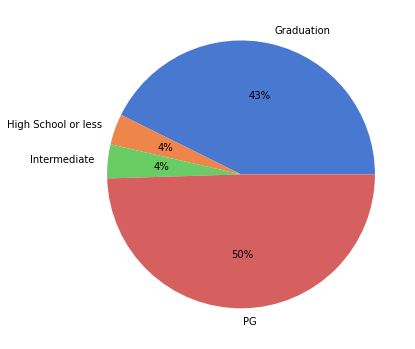

In [64]:
Education=['Graduation','High School or less','Intermediate','PG'] 
fig = plt.figure(figsize =(6, 7))
plt.pie(data, labels =Education,colors=sns.color_palette('muted'),autopct='%.0f%%')

### here we can conclude that pg and graduation get more salaries 

#### plotting boxplot for Dependancies and salary

In [ ]:
sns.boxplot(hr['Dependancies'],hr['Salary'])

In [ ]:
#median is same for depandancy so they are not effecting salary 

#### plotting boxplot for calls and salary

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Calls', ylabel='Salary'>

<AxesSubplot:xlabel='Calls', ylabel='Salary'>

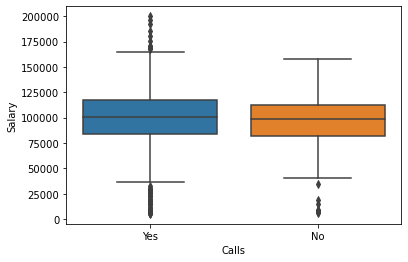

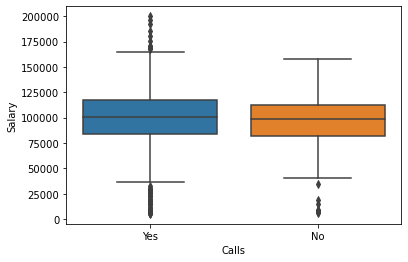

In [34]:

sns.boxplot(hr['Calls'],hr['Salary'])

#### plotting boxplot for Type and salary

In [ ]:
sns.boxplot(hr['Type'],hr['Salary'])

#### plotting boxplot for Billing and salary

In [ ]:
sns.boxplot(hr['Billing'],hr['Salary'])

#### plotting boxplot for Rating and salary

In [ ]:
sns.boxplot(hr['Rating'],hr['Salary'])

### from above all histplot and boxplot we can conclude that all variables like Gender,Business,Type,Rating,Billing,Calls,Dependancies are not effecting salary in anyhow

### Relation between numeric and salary variable

In [ ]:
sns.scatterplot(hr['Salary'],hr['Age'])

#### salary and age are not correlated to each other

In [ ]:
sns.scatterplot(hr['Salary'],hr['Base_pay'])

In [ ]:
sns.regplot(hr['Salary'],hr['Base_pay'],line_kws={'linewidth':3,'color':'darkblue'})

#### salary and Base_pay are highly correlated to each other

In [ ]:
sns.scatterplot(hr['Salary'],hr['Bonus'])

In [ ]:
sns.regplot(hr['Salary'],hr['Bonus'],line_kws={'linewidth':3,'color':'darkblue'})

#### salary and Bonus are highly correlated to each other

In [ ]:
sns.scatterplot(hr['Salary'],hr['Unit_Price'])

In [ ]:
sns.regplot(hr['Salary'],hr['Unit_Price'],line_kws={'linewidth':3,'color':'darkblue'})

In [ ]:
sns.scatterplot(hr['Salary'],hr['Volume'])

In [ ]:
sns.regplot(hr['Salary'],hr['Volume'],line_kws={'linewidth':3,'color':'darkblue'})

In [ ]:
sns.regplot(hr['Salary'],hr['closingbalance'],line_kws={'linewidth':3,'color':'darkblue'})

In [ ]:
sns.regplot(hr['Salary'],hr['low'],line_kws={'linewidth':3,'color':'darkblue'})

In [ ]:
sns.regplot(hr['Salary'],hr['Months'],line_kws={'linewidth':3,'color':'darkblue'})

In [ ]:
sns.scatterplot(hr['Salary'],hr['Unit_Sales'])

In [ ]:
sns.regplot(hr['Salary'],hr['Unit_Sales'],line_kws={'linewidth':3,'color':'darkblue'})

### from above scatter plots we can conclude that unit price,unit sales,Months,low,Volume,closing balance are not correlated to each other


### so droping those column which are highly correlated to each other and not affecting salary

In [ ]:
hr.drop(['Gender','Business','Dependancies','Calls','Type','Billing','Rating',
         'closingbalance','low','Volume','Unit_Price','Unit_Sales',],axis=1, inplace=True)

##### looking for updated dataset 

In [ ]:

hr.head(3)

In [ ]:
hr.shape

#### now datest contains 5000 rows and 7 columns

### Handeling outliers using IQR Method


In [ ]:
sns.boxplot(hr['Salary'])

In [ ]:
q1=np.quantile(hr['Salary'],0.25)
q2=np.quantile(hr['Salary'],0.50)
q3=np.quantile(hr['Salary'],0.75)
IQR=q3-q1
print('IQR',IQR)
upper_whisker=q3+(1.5*IQR)
lower_whisker=q1-(1.5*IQR)

In [ ]:
hr['Salary']=hr['Salary'][(hr['Salary']>lower_whisker)&(hr['Salary']<upper_whisker)]

In [ ]:
hr['Salary'].isnull().sum() 

In [ ]:
hr['Salary']=hr['Salary'].fillna(hr['Salary'].mean())

In [ ]:
hr['Salary'].isnull().sum()

In [ ]:
sns.boxplot(hr['Salary'])

In [ ]:
sns.boxplot(hr['Bonus'])

In [ ]:
q1=np.quantile(hr['Bonus'],0.25)
q2=np.quantile(hr['Bonus'],0.50)
q3=np.quantile(hr['Bonus'],0.75)
IQR=q3-q1
print('IQR',IQR)
upper_whisker=q3+(1.5*IQR)
lower_whisker=q1-(1.5*IQR)

In [ ]:
hr['Bonus']=hr['Bonus'][(hr['Bonus']>lower_whisker)&(hr['Bonus']<upper_whisker)]

In [ ]:
hr['Bonus'].isnull().sum()

In [ ]:
hr['Bonus']=hr['Bonus'].fillna(hr['Bonus'].mean())

In [ ]:
hr['Bonus'].isnull().sum()

In [ ]:
sns.boxplot(hr['Bonus'])

In [ ]:
sns.boxplot(hr['Months'])

#### here we can see that there were numbers of outliers in salary and bonus columns so we handled them using IQR method

In [ ]:
hr

### making dummy variable of categorical data(Education)  and removing Education column and  putting it in main_df variable

In [ ]:
temp_df = pd.get_dummies(hr['Education'], drop_first=True)
temp_df

hr = pd.concat([hr.drop(columns='Education'), temp_df], axis=1)
hr.head(3)

main_df = hr.copy()

In [ ]:
#looking for datset
main_df.head(2)

### Model Building

### Train test split

#### y will predict the salary 

In [ ]:
x=main_df.drop('Salary',axis=1)
y=main_df['Salary']    #target variable

In [ ]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [ ]:
x

In [ ]:
#importing train_test_split using sklearn.model_Selection
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1) 

In [ ]:
#Import Lazypredict and import all libraries
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [ ]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)

In [ ]:
print(models)

In [ ]:
#here salary type is continuous.so first we perform linear regression

### Linear Regression

In [ ]:
#importing linearregression from sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
#fitting training data to linear model
model=LinearRegression()
model.fit(x_train,y_train)

In [ ]:
#using predict to values of x_test
predictions=model.predict(x_test)


In [ ]:
#chceking accuracy for test data. 
model.score(x_test, y_test)

#### here model score is 100 % .

In [ ]:
#finding coef of data
model.coef_

In [ ]:
sns.scatterplot(x=y_test,y=predictions)

In [ ]:
#finding intercept of data
model.intercept_

In [ ]:
#importing metrics from sklearn
#finding mean_absolute error ,root mean absolute error and mean squared error
from sklearn import metrics
print("mean_absolute_error - ", metrics.mean_absolute_error(y_test, predictions))
print("Root_mean_absolute_error - ", np.sqrt(metrics.mean_absolute_error(y_test, predictions)))
print("mean_squared_error - ", metrics.mean_squared_error(y_test, predictions))

In [ ]:
print_df=pd.DataFrame({'test values':y_test,'predicted values':predictions})
print_df

### Decission Tree

In [ ]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1) 

In [ ]:
#importing decisiontreeregressor from sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
dtree=DecisionTreeRegressor(max_depth=3)
dtree.fit(x_train,y_train)

In [ ]:
print(dtree.score(x_test,y_test))

In [ ]:
#predict value for testing data
predictions=dtree.predict(x_test)

In [ ]:
mse=mean_squared_error(y_test,predictions)
rmse=np.sqrt(mse)
rmse
r2=r2_score(y_test,predictions)
print('model performance for test')
print('rmse is -',format(rmse))
print('r2 score is -',format(r2))

In [ ]:
sns.scatterplot(x=y_test,y=predictions)

In [ ]:
print_df=pd.DataFrame({'test values':y_test,'predicted values':predictions})
print_df

#### Model score 96%

### Random Forest Regression

In [ ]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
  
 # create regressor object
regressor = RandomForestRegressor()
  
# fit the regressor with x and y data
regressor.fit(x, y)

In [ ]:
predict=regressor.predict(x_test)


In [ ]:
mse=mean_squared_error(y_test,predict)
rmse=np.sqrt(mse)
rmse
r2=r2_score(y_test,predict)
print('model performance for test')
print('rmse is -',format(rmse))
print('r2 score is -',format(r2))

#### model score 99%

In [ ]:
#visualise reslut from randomforest regression model

In [ ]:
sns.scatterplot(x=y_test,y=predict)

In [ ]:
print_df=pd.DataFrame({'test values':y_test,'predicted values':predict})
print_df

### predict values are almost similar to test values